<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2026/blob/main/tutorial/Tutorial_06_Transforms_and_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, ACU PHYS 453**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

# Tutorial 6 - Transforms and Pipelines

Here we learn about a few more essential tools.

**Pre-reqs:** *ML3 Better Tools* slides



#Transforms


For classifiers like nearest neighbors and neural networks is vital that you scale the data so each feature is treated equally.  Otherwise, features which happen to have bigger numbers will be treated as being farther apart, so they will become more important in minimizing distance.

The good news is that scaling the data is simple using the built-in tools.  In particular, the **pipeline** will make sure we always scale data consistently.

**Scaler Transform References:**
* https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler


**Examples**
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

##Simple Demo

In [ ]:
# Example: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

scaler = StandardScaler()
print(scaler.fit(data))

print("Fit means: ",scaler.mean_)

print("Scaled Data:")
print(scaler.transform(data))

StandardScaler()
Fit means:  [0.5 0.5]
Scaled Data:
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [ ]:
# Can also do a single step:
print(scaler.fit_transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


## Iris Data

Features:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:	 ['setosa' 'versicolor' 'virginica']


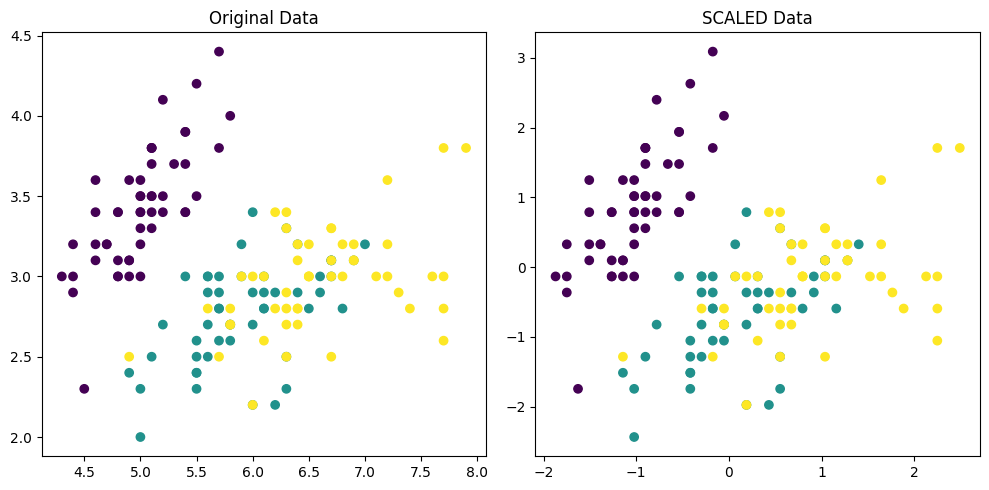

In [ ]:
data = datasets.load_iris()
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

X = data.data
y = data.target

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1],c=y)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1],c=y)
plt.title('SCALED Data')
plt.tight_layout()
plt.show()

## Wine Data
The scaling doesn't make much of a numerical difference on iris because all features are measured in centimeters.  Lets try something more extreme. See more great examples here:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Load up the wine data and look at some stats:

In [ ]:
data = datasets.load_wine(as_frame=True)
print('Features:\t',data.feature_names)
print('Targets:\t',data.target_names)

Features:	 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Targets:	 ['class_0' 'class_1' 'class_2']


In [ ]:
df = data.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


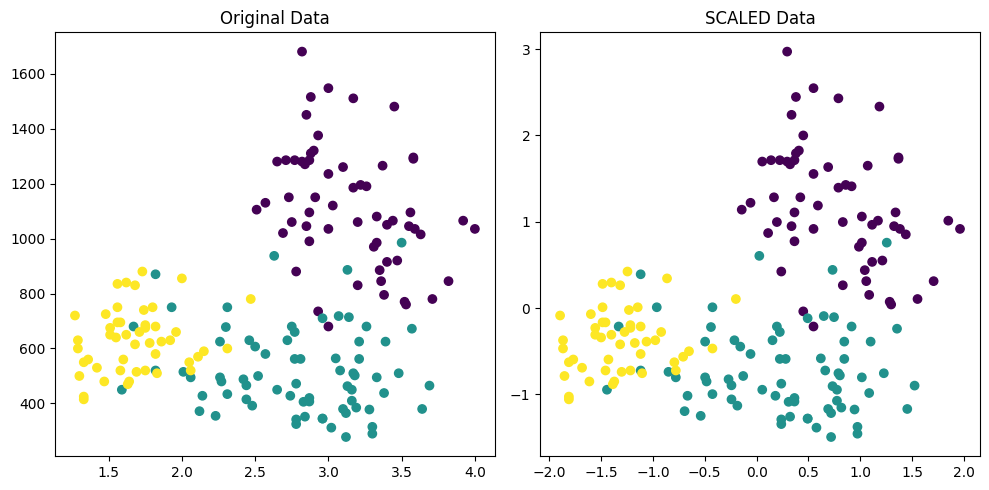

In [ ]:
X,y = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:,11], X[:,12],c=y)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,11], X_scaled[:,12],c=y)
plt.title('SCALED Data')

plt.tight_layout()
plt.show()

In [ ]:
# Does it make a difference?
clf = KNeighborsClassifier(n_neighbors=5)

# UN-scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf.fit(X_train,y_train)
print('UNSCALED score:\t',clf.score(X_test,y_test))

# TOTALLY scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # NEVER FIT TO TEST DATA!
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled,y_train)
print('SCALED score:\t',clf.score(X_test_scaled,y_test))

UNSCALED score:	 0.7333333333333333
SCALED score:	 0.9777777777777777


# Pipelines

A very common bug is to forget to scale some part of the data (see below).  Passing everything through the same pipeline is a great method of ensuring everything gets treated the same way.

**THE ORDER MATTERS!** We will always do the Test/Train split FIRST, then fit (including scaling) just to the training data.  We do NOT fit the transformers to all data, see [avoiding data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage).


**Pipeline References**
* https://scikit-learn.org/stable/modules/compose.html#pipeline
* https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html
* https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html



## A Simple Bug
Here's an example so common it is the first section in the "Common Pitfalls" chapter of the User's Guide:
https://scikit-learn.org/stable/common_pitfalls.html#inconsistent-preprocessing

In [ ]:
# BUGGY CODE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # NEVER FIT TO TEST DATA!
clf.fit(X_train_scaled,y_train)
print('SCALED score:\t',clf.score(X_test,y_test)) # BUG: Forgot to scale test data!!!

SCALED score:	 0.35555555555555557


## Pipeline Example
The fix is really easy.  Define a pipeline with all of transforms and estimators, then call our of our function directly on the pipe!

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [ ]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Whenever we use the pipeline it **automatically** does the transforms for us!

In [ ]:
pipe.fit(X_train,y_train)
print('TRAIN\t', pipe.score(X_train,y_train))
print('TEST\t', pipe.score(X_test,y_test))

TRAIN	 0.9774436090225563
TEST	 0.9777777777777777
